### Introduction

##### Purpose of the Notebook:

I want to recreate the https://drones.pitchinteractive.com/ dotplot for USA Mass Shootings.

Doing so, I need to code up a way to create dotplots.

### 1. Imports
##### 1.1 Import libraries and write settings.

In [1]:
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings("ignore")

# Standard Plotting - Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

import datetime

%config InlineBackend.figure_format = "retina"
%matplotlib inline

# set a standard fontname to use
fontname = "Enigmatic Unicode"

In [2]:
def set_dark_style(fig, ax, legend = None, fontname='Enigmatic Unicode'):
    ax.title.set_fontsize(18)
    ax.xaxis.label.set_color('#f0f0f0')
    ax.yaxis.label.set_color('#f0f0f0')
    ax.set_facecolor('#252526')
    fig.set_facecolor('#252526')
    ax.title.set_color('#f0f0f0')
    ax.title.set_fontname(fontname)
    ax.grid(linestyle='-', linewidth='0.5', color='#737373')
    ax.tick_params(axis='both', colors='#969696', length = 0)
    for spine in ax.spines.values():
        spine.set_visible(False)
    if legend is not None:
        for text in legend.get_texts():
            text.set_color("#f0f0f0")
            text.set_fontname(fontname)
        legend.set_frame_on(True)
        frame = legend.get_frame()
        frame.set_facecolor('#252526')
        frame.set_edgecolor('#252526')

### 2. Data Manipulation

In [3]:
# set path to "School Shootings in the USA.csv"
file_path = 

df = pd.read_csv(file_path,
                 index_col = 0)
df['dt'] = pd.to_datetime(df.dt)
df['dt_by_month'] = df.dt.apply(lambda x: x.replace(day = 15))

In [4]:
# the dataframe has counts by event listed: Injuries and Deaths
# for each one of them, repeat the index to duplicate the rows.
expanded_index_deaths = np.repeat(df.index, df.Deaths)
df_indivual_deaths = df.loc[expanded_index_deaths].assign(victim_type = 'Death')

expanded_index_inj = np.repeat(df.index, df.Injuries)
df_indivual_inj = df.loc[expanded_index_inj].assign(victim_type = 'Injury')

# join the dataframes of individuals back together
df_individuals = pd.concat([df_indivual_deaths, df_indivual_inj]).sort_values(by = ['dt_by_month', 'victim_type'])

# get cumulated count by event | date | month
df_individuals['count_by_event'] = df_individuals.groupby('Description').cumcount().add(.5)
df_individuals['count_by_date'] = df_individuals.groupby('dt').cumcount().add(.5)
df_individuals['count_by_month'] = df_individuals.groupby('dt_by_month').cumcount().add(.5)

#cumulative counts
df['cumulative_deaths'] = df.Deaths.cumsum()
df['cumulative_inj'] = df.Injuries.cumsum()
#xtick_dates = pd.date_range(df.dt.min(), df.dt.max(), periods = 8).values

# assign a color based on group type
df_individuals['color'] = np.where(df_individuals.victim_type == 'Death', "#cb181d", "#bdbdbd")

### 3. Plot

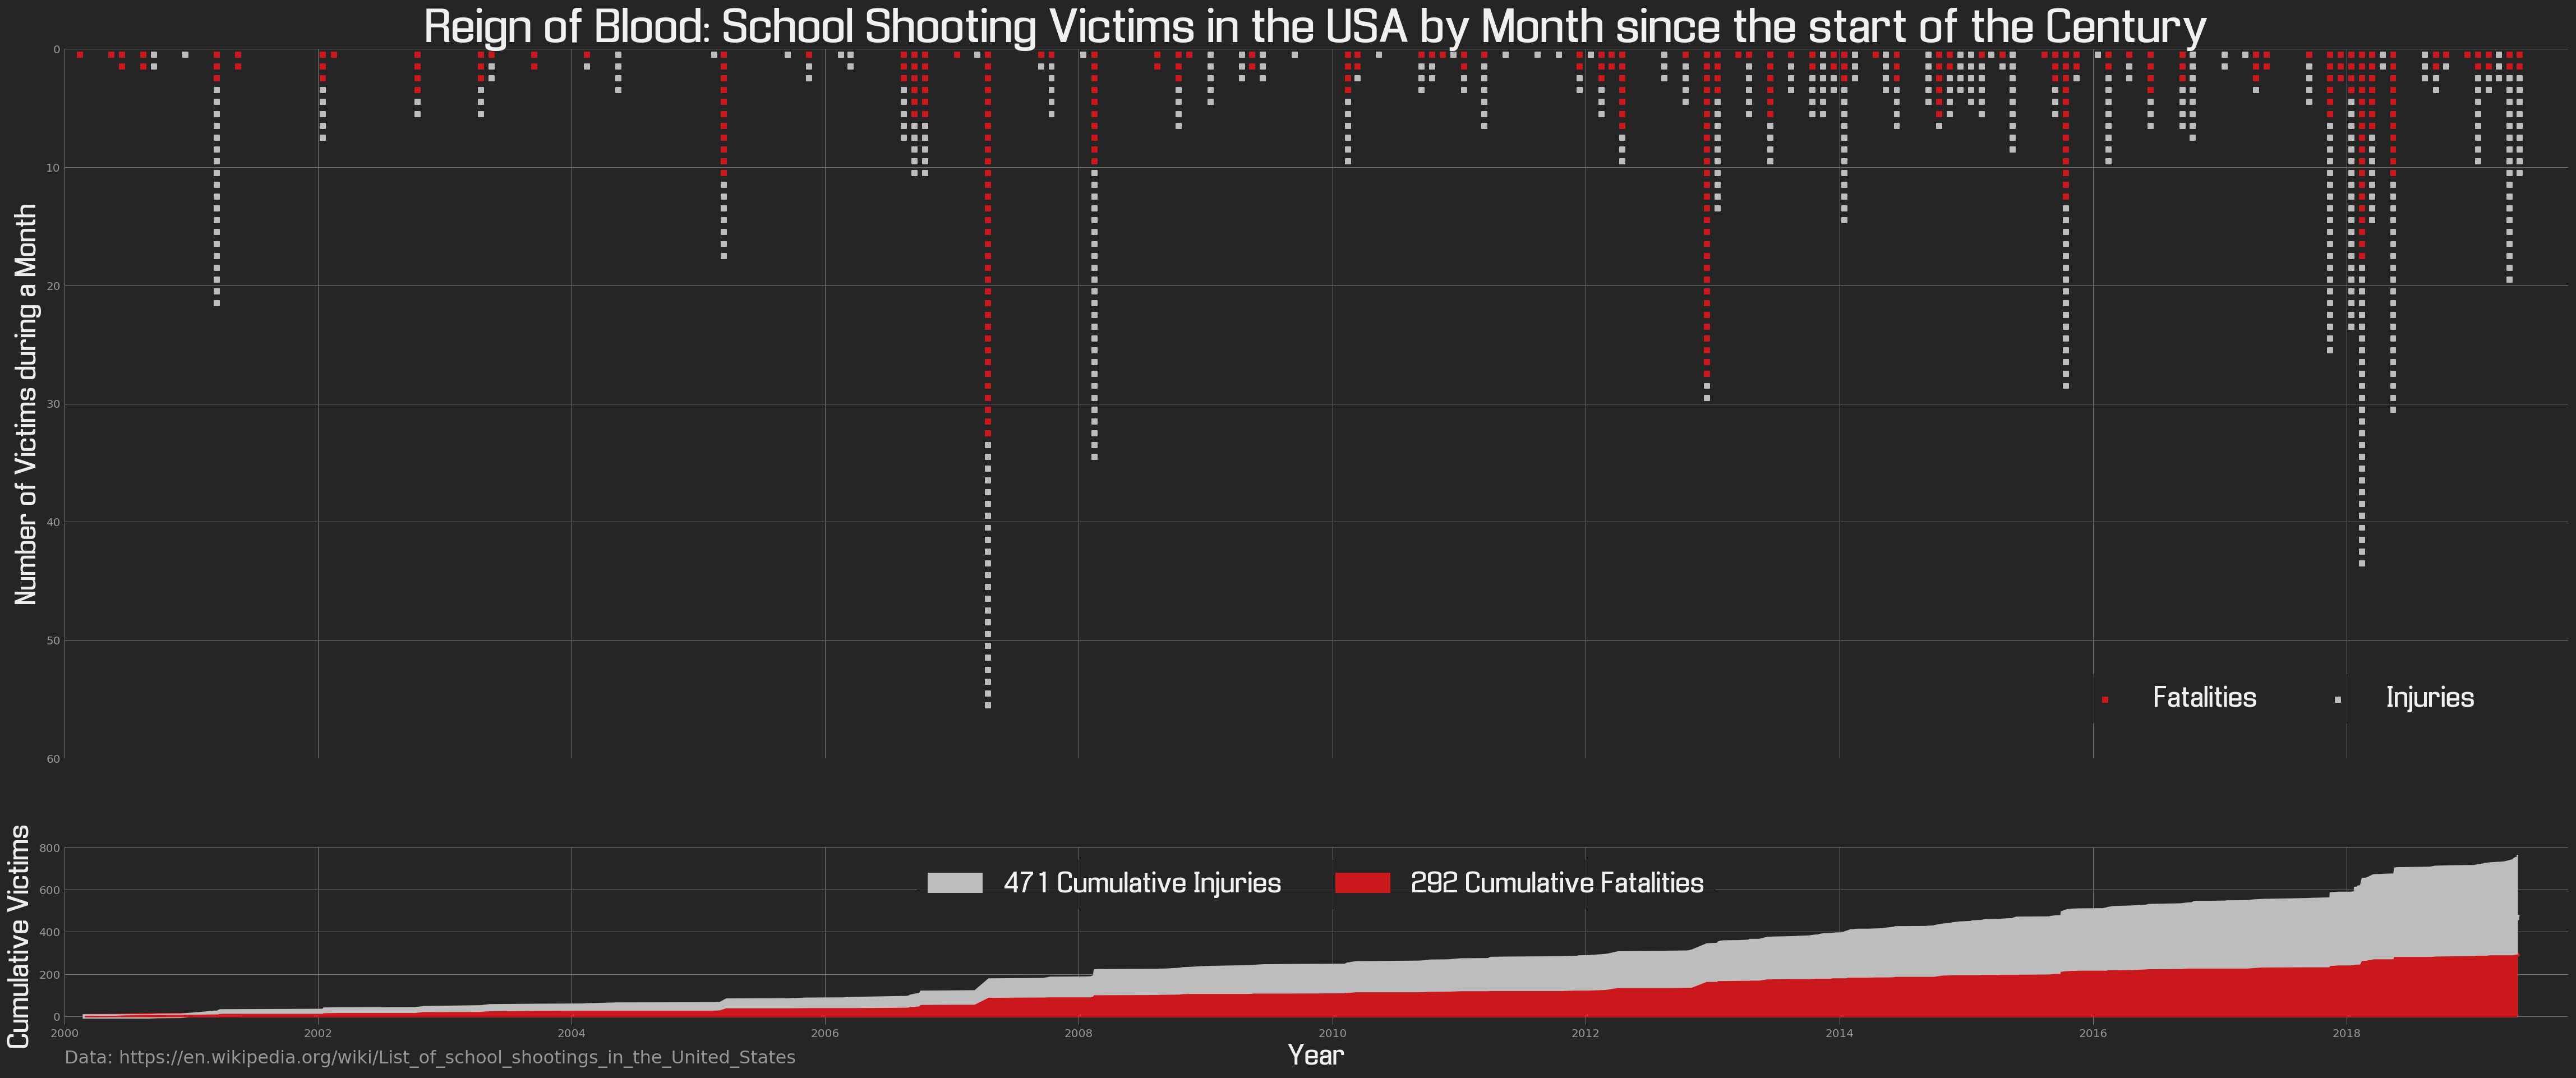

In [5]:
fig, ax = plt.subplots(2,1, figsize = (40, 16),
                       gridspec_kw={'height_ratios': (0.8, 0.2)},
                       sharex=True)

min_date = '2000-1-1'

N_deaths = df.loc[df.dt >= min_date, 'cumulative_deaths'] - df.loc[df.dt < min_date, 'cumulative_deaths'].max()
N_inj = df.loc[df.dt >= min_date, 'cumulative_inj'] - df.loc[df.dt < min_date, 'cumulative_inj'].max()
N_total = N_deaths + N_inj

plt.sca(ax[0])
plt.scatter(df_individuals.loc[df_individuals.victim_type == 'Death', 'dt_by_month'], df_individuals.loc[df_individuals.victim_type == 'Death', 'count_by_month'],
            c = df_individuals.loc[df_individuals.victim_type == 'Death', 'color'], marker = 's', s = 20, label = 'Fatalities')
plt.scatter(df_individuals.loc[df_individuals.victim_type == 'Injury', 'dt_by_month'], df_individuals.loc[df_individuals.victim_type == 'Injury', 'count_by_month'],
            c = df_individuals.loc[df_individuals.victim_type == 'Injury', 'color'], marker = 's', s = 20, label = 'Injuries')


leg = plt.legend(ncol = 2, fontsize = 24, loc = (0.8, 0.05))

#sns.set_style('white')
set_dark_style(fig, ax[0], leg)


plt.ylim(0)
ax[0].invert_yaxis()
ax[0].xaxis.grid('off', which = 'both')
plt.xlim(datetime.date(2000, 1, 1), datetime.date(2019, 10, 1))
plt.ylim(60, 0)

plt.ylabel('Number of Victims during a Month', fontname = fontname, fontsize = 24)
plt.title('Reign of Blood: School Shooting Victims in the USA by Month since the start of the Century', fontname = fontname, fontsize = 40);

plt.sca(ax[1])

plt.plot(df.loc[df.dt >= min_date, 'dt'],
                df.loc[df.dt >= min_date, 'cumulative_deaths'] - df.loc[df.dt < min_date, 'cumulative_deaths'].max(),
         color = "#cb181d",
         lw = 4)


plt.plot(df.loc[df.dt >= min_date, 'dt'],
                df.loc[df.dt >= min_date, 'cumulative_inj'] - df.loc[df.dt < min_date, 'cumulative_inj'].max(),
         color = "#bdbdbd",
         lw = 4)

plt.fill_between(x = df.loc[df.dt >= min_date, 'dt'],
                 y1 = 0,
                 y2 = N_total,
                 color = "#bdbdbd",
                 alpha = 1,
                 label = f'{N_inj.max()} Cumulative Injuries',
                 zorder = 99)

plt.fill_between(x = df.loc[df.dt >= min_date, 'dt'],
                 y1 = 0,
                 y2 = N_deaths,
                 color = "#cb181d",
                 alpha = 1,
                 label = f'{N_deaths.max()} Cumulative Fatalities',
                 zorder = 99)

plt.xlabel('Year', fontname = fontname, fontsize = 24)
plt.ylabel('Cumulative Victims', fontname = fontname, fontsize = 24)

leg1 = plt.legend(ncol = 2, fontsize = 24, loc = 'upper center')
set_dark_style(fig, ax[1], leg1)

fig.text(x = 0.125, y = 0.095, s = 'Data: https://en.wikipedia.org/wiki/List_of_school_shootings_in_the_United_States',
         fontsize = 16, ha = 'left', color = '#969696');